<a href="https://colab.research.google.com/github/LivenetsTatiana/works/blob/main/MachineLearning/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<center>Введение в нейронные сети<center/>**
**Цель**: написать и протестировать нейронную сеть

**Задания:**
1. Написать собственную  нейронную сети (без использования
специализированных библиотек)

2. Сгенерировать данные для бинарной классификации (например,
определить по ширине и длине божья коровка перед нами или
гусеница - не по фото, а по «меркам»)

3. Построить график функции потерь

4. Протестировать работу модели на тестовом наборе (3-5 объекта)



In [ ]:
# необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt

# **Нейрон**

Внутри нейрона происходят три операции. Сначала значения входов умножаются на веса:
$$
x_1 \rightarrow x_1 * w_1, x_2 \rightarrow x_2 * w_2
$$
Затем взвешенные входы складываются, и к ним прибавляется значение порога b:
$$
x_1 * w_1+x_2 * w_2+b
$$
Наконец, полученная сумма проходит через функцию активации:
$$
\mathrm{y}=f\left(x_1 * w_1+x_2 * w_2+b\right)
$$


In [ ]:
def sigmoid(x):
  # функция активации: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  # инициализация нейрона весами и пороговым значением
  def __init__(self, weights, b):
    self.weights = weights
    self.b = b
  # прямая связь (проход по нейрону и получение выхода из входных значений)
  def feedforward(self, inputs):
    # Умножаем входы на веса, прибавляем порог, затем используем функцию активации
    total = np.dot(self.weights, inputs) + self.b
    return sigmoid(total)

# инициализация нейрона конкретными значениями весов и порога
weights = np.array([3, 1])
b = 1
n = Neuron(weights, b)

# получение выхода по двум входным значениям
x = np.array([2, 3])
print(n.feedforward(x))

0.9999546021312976


# **Собираем нейронную сеть из нейронов**

Нейронная сеть – это всего лишь несколько нейронов, соединенных вместе. Её слои:

входной слой - скрытый слой - выходной слой

Скрытый слой – это любой слой между входным (первым) слоем сети и выходным (последним). Скрытых слоев может быть много!

In [ ]:
class NeuralNetwork:
  '''
  Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходным слоем с 1 нейроном (o1)
  Все нейроны имеют одинаковые веса и пороги:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    b = 0

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, b)
    self.h2 = Neuron(weights, b)
    self.o1 = Neuron(weights, b)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Входы для o1 - это выходы h1 и h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = NeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


# **Генерация данных**

Пусть у нас есть ширина и высота устройств и для каждой пары этих значений указано является ли устройство телефоном.

In [ ]:
data = np.array([[5,13], [7, 14], [30, 5], [7, 70], [7.5, 15], [50, 50], [4, 5], [7, 8], [7.5, 16], [2, 3]]) # ширина и высота устройств
y = [1, 1, 0, 0, 1, 0, 0, 0, 1, 0] # метка телефон это или нет для каждого устройства (1 - телефон, 0 - нет)

# **Обучение нейронной сети**

Мы используем для расчета потерь среднюю квадратичную ошибку (mean squared error, MSE):
$$
M S E=\frac{1}{n} \sum_{i=1}^n\left(y_{\text {true }}-y_{\text {pred }}\right)^2
$$
Давайте рассмотрим все используемые переменные:
- $\boldsymbol{n}$ - это количество измерений, в нашем случае 10
- $\boldsymbol{y}$ представляет предсказываемое значение
- $\boldsymbol{y}_{\text {true }}$ - истинное значение переменной ("правильный ответ").
- $\boldsymbol{y}_{\text {pred }}$ - предсказанное значение переменной. Это то, что выдаст наша нейронная сеть.

Чем лучшими будут наши предсказания, тем меньшими будут наши потери!

Лучшие предсказания = меньшие потери.

Обучение нейронной сети = минимизация ее потерь.

Мы можем записать функцию потерь как функцию от нескольких переменных:
<center>$$L(w1, w2, w3, w4, w5, w6, b1, b2, b3)$$</center>

Предположим, мы хотим отрегулировать w1. Как изменится значение потери L при изменении w1? На этот вопрос может ответить частная производная dL/dw1.

Прежде всего, перепишем эту частную производную, воспользовавшись цепным правилом:
$$
\frac{\partial L}{\partial w_1}=\frac{\partial L}{\partial y_{\text {pred }}} * \frac{\partial y_{\text {pred }}}{\partial w_1}
$$

Теперь давайте решим, что делать с $\partial y_{\text {pred }} /\partial w_1$. Обозначая выходы нейронов, как прежде, $\mathrm{h}_1, \mathrm{~h}_2$ и $\mathrm{o}_1$, получаем:
$$
y_{\text {pred }}=o_1=f\left(w_5 h_1+w_6 h_2+b_3\right)
$$
$f()$ - это наша функция активации, сигмоида. Поскольку $\mathbf{w}_1$ влияет только на $\mathbf{h}_1$ (но не на $\mathbf{h}_2$ ), мы можем снова использовать цепное правило и записать:
$$
\begin{aligned}
& \frac{\partial y_{\text {pred }}}{\partial w_1}=\frac{\partial y_{\text {pred }}}{\partial h_1} * \frac{\partial h_1}{\partial w_1} \\
& \frac{\partial y_{\text {pred }}}{\partial h_1}=w_5 * f \prime\left(w_5 h_1+w_6 h_2+b_3\right)
\end{aligned}
$$

Мы можем сделать то же самое для $\partial h_1 / \partial w_1$, снова применяя цепное правило:
$$
\begin{aligned}
& h_1=f\left(w_1 x_1+w_2 x_2+b_1\right) \\
& \frac{\partial h_1}{\partial w_1}=x_1 * f \prime\left(w_1 x_1+w_2 x_2+b_1\right)
\end{aligned}
$$
В этой формуле $\mathbf{x}_1$ - это первый признак наших данных, а $\mathbf{x}_2$ - второй.

Вычислим производную сигмоиды:
$$
\begin{gathered}
f(x)=\frac{1}{1+e^{-x}} \\
f \prime(x)=\frac{e^{-x}}{\left(1+e^{-x}\right)^2}=f(x) *(1-f(x))
\end{gathered}
$$
Мы используем эту красивую форму для f'(x) позже.

Мы сумели разложить $\mathbf{d L} / \mathbf{d w}_1$ на несколько частей, которые мы можем рассчитать:
$$
\frac{\partial L}{\partial w_1}=\frac{\partial L}{\partial y_{\text {pred }}} * \frac{\partial y_{\text {pred }}}{\partial h_1} * \frac{\partial h_1}{\partial w_1}
$$
Такой метод расчета частных производных "от конца к началу" называется **методом обратного распространения (backpropagation)**.


**Обучение: стохастический градиентный спуск**

Мы используем алгоритм оптимизации под названием стохастический градиентный спуск (stochastic gradient descent), который определит, как мы будем изменять наши веса и пороги для минимизации потерь. Фактически, он заключается в следующей формуле обновления:
$$
\begin{aligned}
& w_1 \rightarrow w_1-\eta \frac{\partial L}{\partial w_1} \\
& \eta-\text { константа, называемая скоростью обучения (learning rate). }
\end{aligned}
$$
Скорость обучения определяет, как быстро наша сеть учится. Все, что мы делаем - это вычитаем $\eta*dL/dw$ из $ \mathrm{w}_1$ :
- Если $\mathbf{d L} / \mathbf{d w}_1$ положительна, $\mathbf{w}_1$ уменьшится, что уменьшит $\mathbf{L}$.
- Если $\mathbf{d L} / \mathbf{d w}_1$ отрицательна, $\mathbf{w}_1$ увеличится, что также уменьшит $\mathbf{L}$.

Если мы сделаем то же самое для каждого веса и порога в сети, потери будут постепенно уменьшаться, и наша сеть будет выдавать более точные результаты.
Процесс обучения сети будет выглядеть примерно так:

1. Выбираем одно наблюдение из набора данных. Именно то, что мы работаем только с одним наблюдением, делает наш градиентный спуск стохастическим.
2. Считаем все частные производные функции потерь по всем весам и порогам (dL/dw1, dL/dw2 и т.д.)
3. Используем формулу обновления, чтобы обновить значения каждого веса и порога.
4. Снова переходим к шагу 1.

In [ ]:
def deriv_sigmoid(x):
  # Производная сигмоиды: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true и y_pred - массивы numpy одинаковой длины.
  return ((y_true - y_pred) ** 2).mean()

class Network:
  '''
  Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходной слой с 1 нейроном (o1)
  '''
  def __init__(self):
    # Веса
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Пороги
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, y):
    '''
    - data - массив numpy (n x 2) numpy, n = к-во наблюдений в наборе.
    - y - массив numpy с n элементами.
      Элементы y соответствуют наблюдениям в data.
    '''
    learn_rate = 0.1
    epochs = 1000 # сколько раз пройти по всему набору данных
    ep =[]
    los = []
    for epoch in range(epochs):
      for x, y_true in zip(data, y):
        # --- Прямой проход (эти значения нам понадобятся позже)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Считаем частные производные.
        # --- Имена: d_L_d_w1 = "частная производная L по w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Нейрон o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Нейрон h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Нейрон h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Обновляем веса и пороги
        # Нейрон h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Нейрон h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Нейрон o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Считаем полные потери в конце каждой эпохи

      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(y, y_preds)
        ep.append(epoch)
        los.append(loss)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
    return ep, los

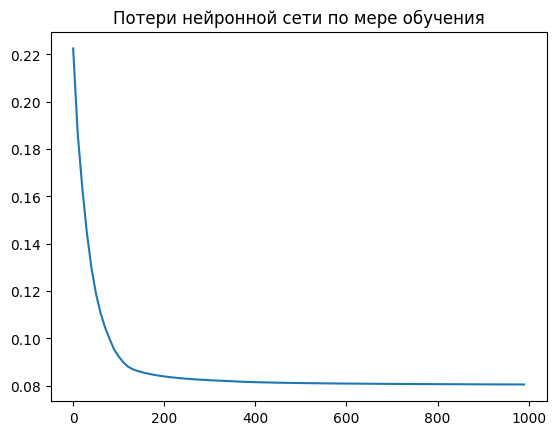

In [ ]:
network = Network()
epochs, loss = network.train(data, y)
plt.plot(epochs, loss)
plt.title("Потери нейронной сети по мере обучения")
plt.show()

# **Предсказания**

In [ ]:
# Делаем пару предсказаний
a = np.array([7, 15])
b = np.array([8, 8])
c = np.array([8, 4])
# если значение ближе к 0, то это 0, если к 1 - 1
print("a: %.3f" % network.feedforward(a)) # на выходе получаем, что это телефон - верно
print("b: %.3f" % network.feedforward(b)) # на выходе получаем, что это не телефон - верно
print("b: %.3f" % network.feedforward(b)) # на выходе получаем, что это не телефон - верно

a: 0.797
b: 0.018
b: 0.018


# **Вывод**

Без использования специализированных библиотек построена нейронная сеть с 2 входами, 2 нейронами в скрытом слое и 1 нейроном в выходном слое для определения по ширине и высоте устройства является ли оно телефоном.

Затем нейронная сеть была обучена - подбирались веса и пороги нейронов, так, чтобы ошибка при классификации была минимальной (потери сводились к минимуму). В качестве алгоритма оптимизации использован стохастический градиентный спуск, а расчет потерь осуществлялся с помощью средней квадратичной ошибки.

После обучения нейронная сеть протестирована на 3 объектах и правильно определила все 3 объекта, как телефон, не телефон и не телефон.